<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Исследуемые-параметры-и-графики" data-toc-modified-id="Исследуемые-параметры-и-графики-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследуемые параметры и графики</a></span><ul class="toc-item"><li><span><a href="#Топ-10-городов-по-количеству-рейсов" data-toc-modified-id="Топ-10-городов-по-количеству-рейсов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Топ 10 городов по количеству рейсов</a></span></li><li><span><a href="#Графики" data-toc-modified-id="Графики-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Графики</a></span><ul class="toc-item"><li><span><a href="#Зависимость-количества-полетов-от-медели-самолета" data-toc-modified-id="Зависимость-количества-полетов-от-медели-самолета-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Зависимость количества полетов от медели самолета</a></span></li><li><span><a href="#Зависимость-количества-полетов-от-городов" data-toc-modified-id="Зависимость-количества-полетов-от-городов-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Зависимость количества полетов от городов</a></span></li><li><span><a href="#Зависимость-количества-полетов-от-городов-топ-10" data-toc-modified-id="Зависимость-количества-полетов-от-городов-топ-10-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Зависимость количества полетов от городов топ 10</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Аналитика в авиакомпании

Получены файлы, в которых содержатся результаты запросов из предыдущих этапов проекта.

/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:

- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:

- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город за день в сентябре 2018 года


Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- проверить гипотезу о влиянии фестевалей на средний спрос на авиабилеты.

## Изучение данных

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
display(query_1)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
query_3 = pd.read_csv('/datasets/query_3.csv')
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [5]:
display(query_3)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [6]:
query_3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [7]:
query_3.duplicated().sum()

0

In [8]:
query_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [9]:
query_1.duplicated().sum()

0

In [10]:
display(query_3)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


## Исследуемые параметры и графики

### Топ 10 городов по количеству рейсов

In [11]:
top10_cities=query_3.sort_values(by='average_flights', ascending=False).head(10)

In [12]:
top10_cities

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


### Графики

#### Зависимость количества полетов от медели самолета

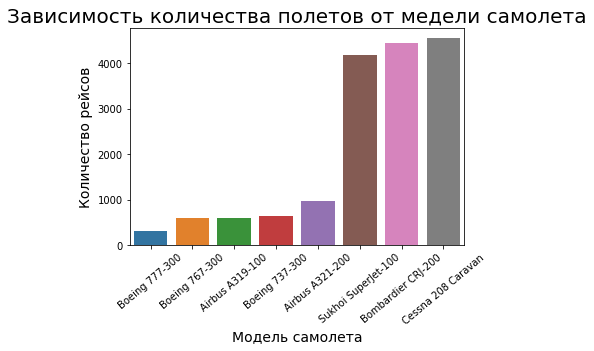

In [13]:
sort1 = query_1.sort_values(by='flights_amount')
sns.barplot(x='model', y='flights_amount', data=sort1, label="line")
plt.title('Зависимость количества полетов от медели самолета', fontsize=20)
plt.xlabel('Модель самолета', fontsize=14)
plt.ylabel('Количество рейсов', fontsize=14)
plt.xticks(rotation=40)
plt.show()

Cessna 208, bombardier crj-200, superjet-100 совершают в разы больше перелетов, чем остальные самолеты

#### Зависимость количества полетов от городов

Считаю, что целесообразнее брать топ-10 городов, потому что остальные города с очень не большим кол-вом полетов будут только усложнять чтение графика.

In [14]:
sort2 = query_3.sort_values(by='average_flights')

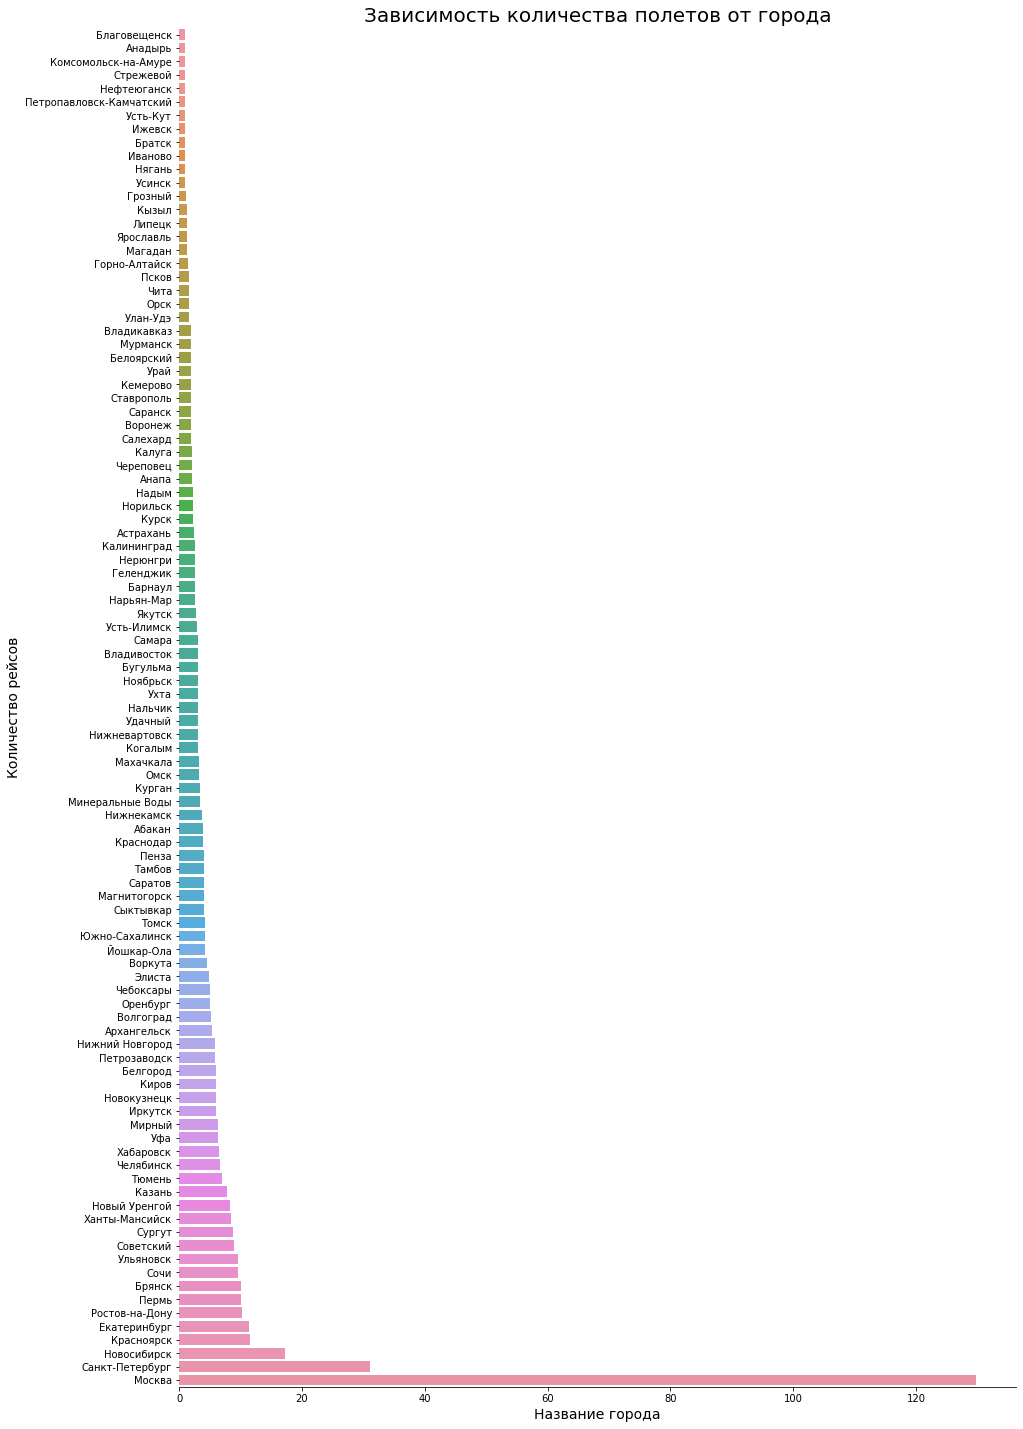

In [15]:
plt.figure(figsize=(15, 25))
sns.barplot(x='average_flights', y='city', data=sort2)
plt.title('Зависимость количества полетов от города', fontsize=20)
plt.xlabel('Название города', fontsize=14)
plt.ylabel('Количество рейсов', fontsize=14)
sns.despine(left=True)
plt.show()

Москва впереди планеты всей) Это очевидно, далее Питер и Новосибирск

#### Зависимость количества полетов от городов топ 10

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

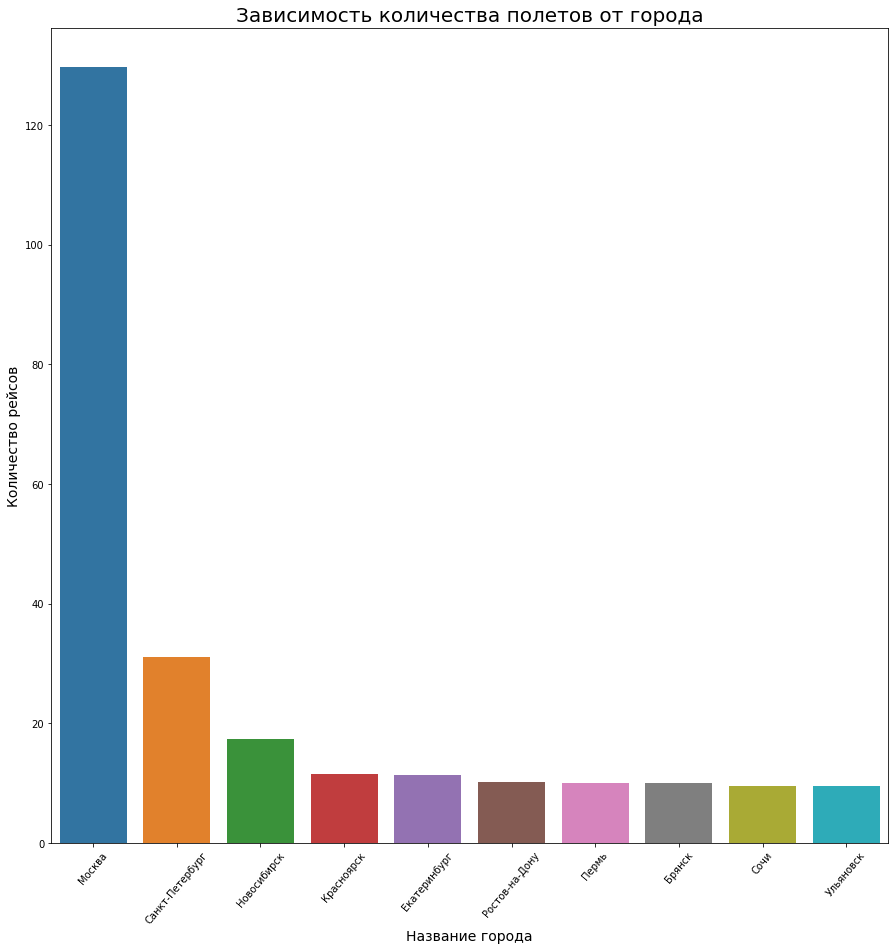

In [16]:
plt.figure(figsize=(15, 15))
sns.barplot(x='city', y='average_flights', data=top10_cities)
plt.title('Зависимость количества полетов от города', fontsize=20)
plt.xlabel('Название города', fontsize=14)
plt.ylabel('Количество рейсов', fontsize=14)
plt.xticks(rotation=50)

Москва, Питер, Новосибирск топ 3

- Москва и Питер наиболее большие города России. Москва вообще, как государство в государстве. Плотность населения в этих городах намного выше, поэтому и рейсов намного больше.
    
- Недаром Новосибирск-это столица Сибири, да и Красноярск большой город. И расстояния между городами в Сибири больше и дороги не такие хорошие, как в Европейской части России, поэтому кроме, как на самолете до некоторых мест не доберешься.
    
- Да, в 2018 году был Чемпионат Мира по футболу. Скорее всего Ростов попал сюда именно поэтому. Остальные города в топе, мне кажется, вполне заслуженно.
    
- Скорее всего по Сибири как, раз рентабельно посылать в рейсы более маленькие самолеты. Плотность населения, не такая большая, чтобы посылать в рейсы большие самолеты.

## Вывод

Самые распространенные самолеты по колличеству рейсов :
 1. Cessna 208
 2. Bombardier crj-200
 3. Superjet-100

Топ-5 городов по колличеству рейсов:
1. Москва
2. Санкт-Петербург
3. Новосибирск
4. Екатеринбург
5. Красноярск

Москва, Санкт-Петербург и Новосибирск имеют самое большое колличество рейсов, далее колличество рейсов по городам различается не на много.